

# Import libraries.


In [1]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense,BatchNormalization,Dropout,Input
from keras.models import Sequential, Model
from keras.layers import Conv2D
from tensorflow.keras import datasets, layers, models
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


# bussiness task
The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

This dataset was inspired by the Fashion-MNIST 2 and the machine learning pipeline for gestures by Sreehari 4.

A robust visual recognition algorithm could provide not only new benchmarks that challenge modern machine learning methods such as Convolutional Neural Nets but also could pragmatically help the deaf and hard-of-hearing better communicate using computer vision applications. The National Institute on Deafness and other Communications Disorders (NIDCD) indicates that the 200-year-old American Sign Language is a complete, complex language (of which letter gestures are only part) but is the primary language for many deaf North Americans. ASL is the leading minority language in the U.S. after the "big four": Spanish, Italian, German, and French. One could implement computer vision in an inexpensive board computer like Raspberry Pi with OpenCV, and some Text-to-Speech to enabling improved and automated translation applications


In [2]:
seed = 42
np.random.seed =seed

# Reading Data

In [3]:
train_path = '../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'
test_path  = '../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'

In [6]:
train = pd.read_csv('sign_mnist_train.csv')
test  = pd.read_csv('sign_mnist_test.csv')

In [7]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [8]:
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


# Data Cleaning
1.   Check Null data 
2.   Drop Non Important Data
3.   check douplicate data 


<AxesSubplot:>

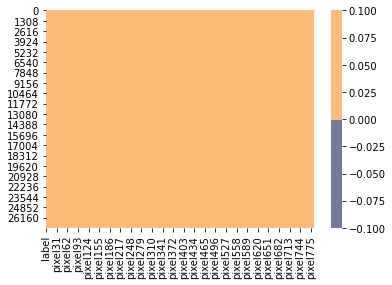

In [9]:
cols =train.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:>

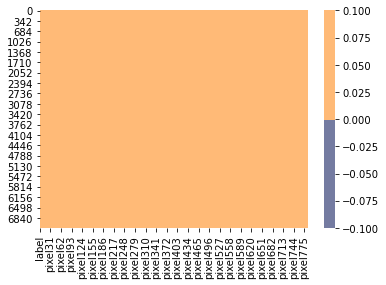

In [10]:
cols =test.columns
colours = ['#747BA1', '#FFBA77'] # specify the orange  - yellow is missing. blue is not missing.
sns.heatmap(test[cols].isnull(), cmap=sns.color_palette(colours))

In [11]:
train.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [12]:
test.isna().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [13]:
train = train.drop_duplicates()
test  = test.drop_duplicates()

In [14]:
# here in this part we will ckeck shape of data so we want to reshape data to be (x,28,28,1)

In [15]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [16]:
label = train['label']
train = train.drop(['label'],axis=1)

In [17]:
test_label = test['label']
test = test.drop(['label'],axis=1)

In [18]:
print(train.shape)
print(test.shape)
print(label.shape)
print(test_label.shape)

(27455, 784)
(7172, 784)
(27455,)
(7172,)


# Data Visualization
in this part we will analays and versialize each part of data to be in near step from our goal then pased on deployed models we will sense best factior that affect on our bussiness goal



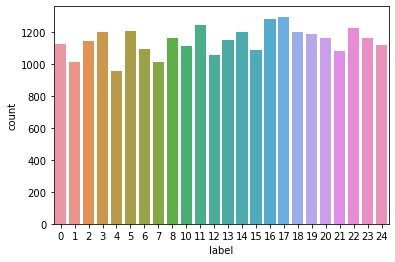

In [19]:
sns.countplot(x= label)
plt.show()

# Data Normalization
hear we need to normalize data between 0,1 instead of 0,255 which nmuch better to make sure that all data have same importants

In [20]:
train = train /255
test  = test /255

In [21]:
train = np.array(train)
test  = np.array(test)

In [22]:
train = train.reshape(train.shape[0],28,28,1)
test  = test.reshape(test.shape[0],28,28,1)

In [23]:
print(train.shape)
print(test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


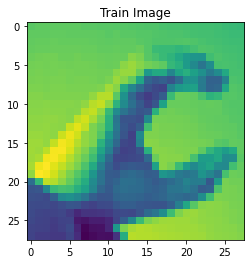

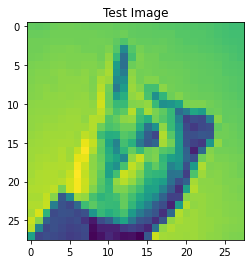

In [24]:
image_x = random.randint(0,len(test))
plt.imshow(np.reshape(train[image_x],(28,28)))
plt.title('Train Image')
plt.show()
plt.imshow(np.reshape(test[image_x],(28,28)))
plt.title('Test Image')
plt.show()


# Buliding Model

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),padding ='Same',activation = 'relu',input_shape=(28,28,1)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(layers.Conv2D(128,(3,3),padding ='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2,2))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(25, activation ='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       7

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [30]:
history = model.fit(train,label,epochs=10,validation_data=(test,test_label))


Epoch 1/10


C:\Users\KRITHIGA\Anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


858/858 [==============================] - 90s 98ms/step - loss: 0.5725 - accuracy: 0.8241 - val_loss: 0.1137 - val_accuracy: 0.9590
Epoch 2/10
858/858 [==============================] - 86s 100ms/step - loss: 0.0404 - accuracy: 0.9866 - val_loss: 0.1814 - val_accuracy: 0.9537
Epoch 3/10
858/858 [==============================] - 84s 98ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.2030 - val_accuracy: 0.9501
Epoch 4/10
858/858 [==============================] - 83s 97ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.1810 - val_accuracy: 0.9536
Epoch 5/10
858/858 [==============================] - 83s 97ms/step - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.2162 - val_accuracy: 0.9442
Epoch 6/10
858/858 [==============================] - 83s 97ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.2060 - val_accuracy: 0.9437
Epoch 7/10
858/858 [==============================] - 83s 96ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.7610 - val_accuracy: 0.8147
Ep

In [31]:
model.evaluate(test, test_label)

225/225 [==============================] - 5s 23ms/step - loss: 0.4001 - accuracy: 0.8991


[0.4000757038593292, 0.8990518450737]

# predection

In [32]:
#get predection
predictions = model.predict(test)
predictions = np.argmax(predictions, axis = 1)
predictions[5]

225/225 [==============================] - 9s 22ms/step


21

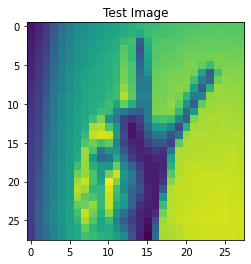

In [33]:
plt.imshow(np.reshape(test[5],(28,28)))
plt.title('Test Image')
plt.show()

225/225 - 5s - loss: 0.4001 - accuracy: 0.8991 - 5s/epoch - 22ms/step


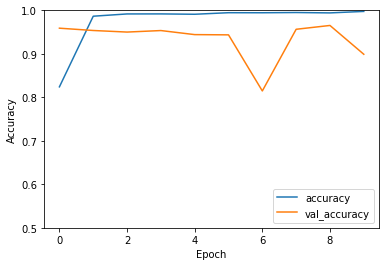

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test,  test_label, verbose=2)